In [1]:
import pandas as pd
import os

In [2]:
PROGRAM_PATH = os.getcwd()
FILE_PATH = "SPY.csv"
csv_path = os.path.join(PROGRAM_PATH, FILE_PATH)
print(csv_path)

/Users/soka_1215/Documents/GitHub/FintechFYP/LSTM_trial_1/SPY.csv


In [3]:
df = pd.read_csv(csv_path)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,127.760002,128.380005,127.430000,127.500000,102.458992,193697900
1,2012-01-04,127.199997,127.809998,126.709999,127.699997,102.619682,127186500
2,2012-01-05,127.010002,128.229996,126.430000,128.039993,102.892876,173895000
3,2012-01-06,128.199997,128.220001,127.290001,127.709999,102.627716,148050000
4,2012-01-09,128.000000,128.179993,127.410004,128.020004,102.876831,99530200
...,...,...,...,...,...,...,...
2971,2023-10-24,422.649994,424.820007,420.739990,423.630005,423.630005,78564200
2972,2023-10-25,421.890015,421.920013,417.019989,417.549988,417.549988,94223200
2973,2023-10-26,416.450012,417.329987,411.600006,412.549988,412.549988,115156800
2974,2023-10-27,414.190002,414.600006,409.209991,410.679993,410.679993,107228400


In [4]:
df = df[['Date', 'Close']]

df

,Date,Close
0,2012-01-03,127.500000
1,2012-01-04,127.699997
2,2012-01-05,128.039993
3,2012-01-06,127.709999
4,2012-01-09,128.020004
...,...,...
2971,2023-10-24,423.630005
2972,2023-10-25,417.549988
2973,2023-10-26,412.549988
2974,2023-10-27,410.679993


In [5]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('2013-03-19')
datetime_object

datetime.datetime(2013, 3, 19, 0, 0)

In [6]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

/var/folders/tt/rynv9sfx6hd7zsm3w8y6qv8c0000gn/T/ipykernel_57315/2565755782.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


0      2012-01-03
1      2012-01-04
2      2012-01-05
3      2012-01-06
4      2012-01-09
          ...    
2971   2023-10-24
2972   2023-10-25
2973   2023-10-26
2974   2023-10-27
2975   2023-10-30
Name: Date, Length: 2976, dtype: datetime64[ns]

In [7]:
df.index = df.pop('Date')
df

,Close
Date,
2012-01-03,127.500000
2012-01-04,127.699997
2012-01-05,128.039993
2012-01-06,127.709999
2012-01-09,128.020004
...,...
2023-10-24,423.630005
2023-10-25,417.549988
2023-10-26,412.549988


In [8]:
import matplotlib.pyplot as plt

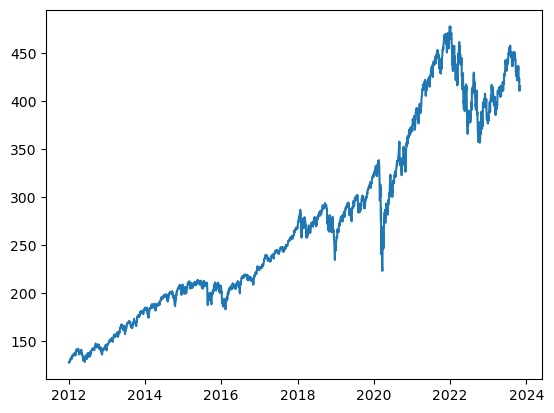

In [10]:
plt.plot(df.index, df['Close'])

In [21]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df, 
                                '2012-01-06', 
                                '2023-10-30', 
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2012-01-06,127.500000,127.699997,128.039993,127.709999
1,2012-01-09,127.699997,128.039993,127.709999,128.020004
2,2012-01-10,128.039993,127.709999,128.020004,129.130005
3,2012-01-11,127.709999,128.020004,129.130005,129.199997
4,2012-01-12,128.020004,129.130005,129.199997,129.509995
...,...,...,...,...,...
2968,2023-10-24,426.429993,421.190002,420.459991,423.630005
2969,2023-10-25,421.190002,420.459991,423.630005,417.549988
2970,2023-10-26,420.459991,423.630005,417.549988,412.549988
2971,2023-10-27,423.630005,417.549988,412.549988,410.679993


In [22]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((2973,), (2973, 3, 1), (2973,))

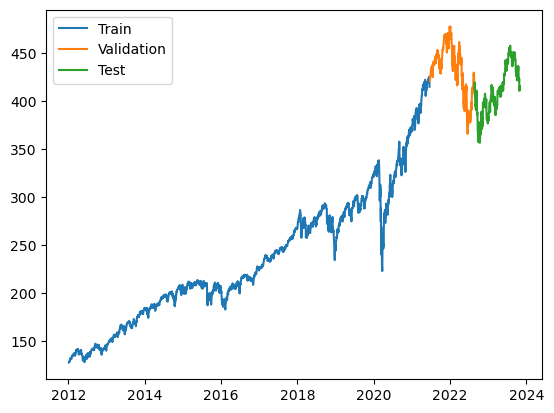

In [23]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20)

2023-11-01 23:03:43.033764: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/soka_1215/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Epoch 1/20
75/75 [==============================] - 4s 13ms/step - loss: 57167.5977 - mean_absolute_error: 229.0247 - val_loss: 170197.6250 - val_mean_absolute_error: 411.7404
Epoch 2/20
75/75 [==============================] - 0s 5ms/step - loss: 25704.1230 - mean_absolute_error: 136.0571 - val_loss: 48592.7461 - val_mean_absolute_error: 218.9208
Epoch 3/20
75/75 [==============================] - 0s 4ms/step - loss: 3658.0798 - mean_absolute_error: 46.0761 - val_loss: 26918.9277 - val_mean_absolute_error: 162.0515
Epoch 4/20
75/75 [==============================] - 0s 4ms/step - loss: 569.3524 - mean_absolute_error: 10.0025 - val_loss: 9233.3740 - val_mean_absolute_error: 92.7050
Epoch 5/20
75/75 [==============================] - 0s 4ms/step - loss: 130.8058 - mean_absolute_error: 4.8462 - val_loss: 4692.2021 - val_mean_absolute_error: 64.2100
Epoch 6/20
75/75 [==============================] - 0s 6ms/step - loss: 51.5670 - mean_absolute_error: 3.5329 - val_loss: 2789.2231 - val_mea

75/75 [==============================] - 1s 2ms/step


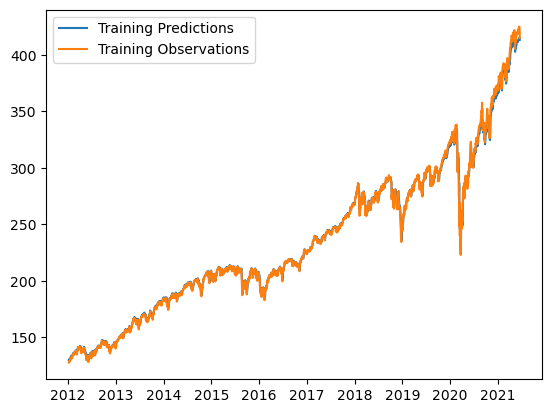

In [25]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

10/10 [==============================] - 0s 4ms/step


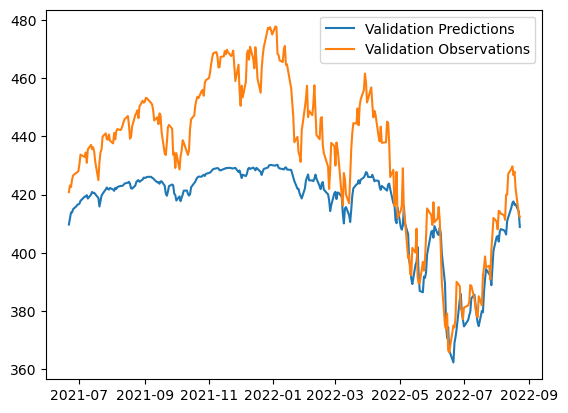

In [26]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

10/10 [==============================] - 0s 2ms/step


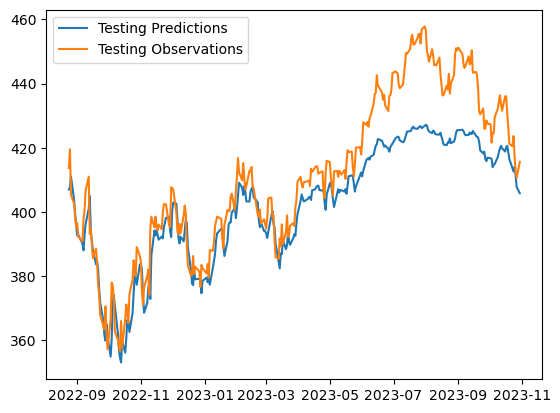

In [27]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

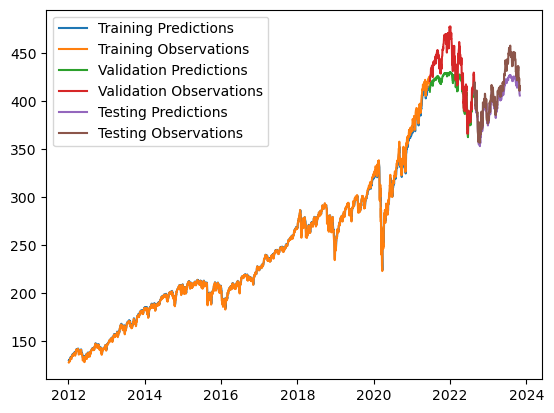

In [28]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])

In [29]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 [==============================] - 0s 26ms/step


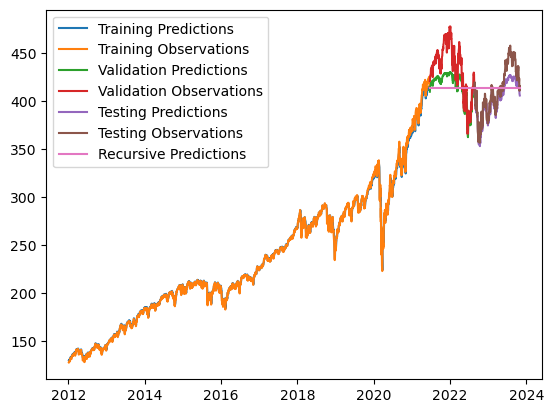

In [30]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations',
            'Recursive Predictions'])